In [2]:
import torchvision
from torchvision import transforms

trainset = torchvision.datasets.FashionMNIST(root = "./data", train = True, download = True, transform = transforms.ToTensor())
testset = torchvision.datasets.FashionMNIST(root = "./data", train = False, download = True, transform = transforms.ToTensor())

In [3]:
classes = ('T-Shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot')

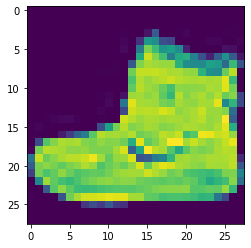

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
def show(img):
    npimg = img.numpy().reshape((28,28))
    plt.imshow(npimg)

show(trainset[0][0])

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.914
[1,  4000] loss: 0.598
[1,  6000] loss: 0.534
[1,  8000] loss: 0.498
[1, 10000] loss: 0.482
[1, 12000] loss: 0.464
[1, 14000] loss: 0.452
[2,  2000] loss: 0.427
[2,  4000] loss: 0.410
[2,  6000] loss: 0.404
[2,  8000] loss: 0.405
[2, 10000] loss: 0.411
[2, 12000] loss: 0.388
[2, 14000] loss: 0.378
Finished Training


In [8]:
total_correct = 0
total_false = 0
for i in range(10000):
  predicted = classes[torch.argmax(net(testset[i][0])).numpy().tolist()]
  original = classes[testset[i][1]]

  if(predicted == original):
    total_correct += 1
  else:
    total_false += 1
  
  if i % 2000 == 1999:
    print(f'{i} predicted')

print(total_correct, total_false)

1999 predicted
3999 predicted
5999 predicted
7999 predicted
9999 predicted
8486 1514


In [9]:
print("accuracy: ", total_correct/len(testset) * 100)

accuracy:  84.86


Prediction:  Trouser


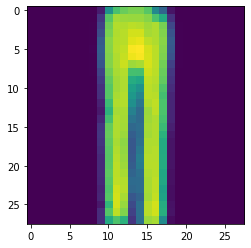

In [64]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.util import img_as_ubyte

url = "https://www.galeria.de/dw/image/v2/karstadt/APInoauth/storage/VX-1/file/VX-3180240/0.013169664447730378/VX-3180240.jpeg?sw=1200&sh=1200&sm=fit"
img1 = imread(url, as_gray=True)
img2 = resize(img1, (28, 28))
img3 = img_as_ubyte(img2)
img3 = ~img3
img3 = img3.astype(np.float32)
img3 = torch.from_numpy(img3.reshape((1, 28, 28)))

show(img3)
print("Prediction: ", classes[torch.argmax(net(img3)).numpy().tolist()])